# Defense-Gan

Description: Implement the Defense-Gan as proposed in the paper [Defense-GAN: Protecting Classifiers Against Adversarial Attacks Using Generative Models](https://arxiv.org/abs/1805.06605).

## Setup

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from IPython import display

## Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
# Normalize the images to [0, 1]
x_train = x_train/255.0
x_train = x_train.astype('float32')
x_test = x_test/255.0
x_test = x_test.astype('float32')

In [0]:
# load gen_train generated by WGAN-GP from original training images
# load gen_test generated by WGAN-GP from perturbed test images
# uncomment the code if you already have them

gen_train = np.load('/content/drive/My Drive/Colab Notebooks/Defense-GAN/data/gen_train.npy')
gen_test = np.load('/content/drive/My Drive/Colab Notebooks/Defense-GAN/data/gen_test.npy')

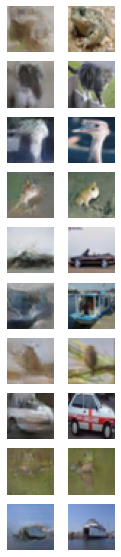

In [0]:
# left column is `gen_test`
# right column is `x_test`
# uncomment the code if you already have `gen_test`

'''
plt.figure(figsize=(2,10))
for i in range(1, 11):
  plt.subplot(10, 2, 2*i-1)
  plt.imshow(gen_test[i+300])
  plt.axis('off')
  plt.subplot(10, 2, 2*i)
  plt.imshow(x_test[i+300])
  plt.axis('off')
'''

## CNN (use original training data `x_train`)

In [0]:
model_org = models.Sequential()
model_org.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_org.add(layers.MaxPooling2D((2, 2)))
model_org.add(layers.BatchNormalization())
model_org.add(layers.Dropout(0.2))

model_org.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_org.add(layers.MaxPooling2D((2, 2)))
model_org.add(layers.BatchNormalization())
model_org.add(layers.Dropout(0.2))

model_org.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_org.add(layers.BatchNormalization())
model_org.add(layers.Flatten())
model_org.add(layers.Dense(64, activation='relu'))
model_org.add(layers.Dense(10))

In [0]:
model_org.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_org.fit(x_train, y_train, epochs=8, 
                    validation_data=(x_test, y_test))

Epoch 1/8
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4357 - accuracy: 0.4929 - val_loss: 1.1721 - val_accuracy: 0.5836
Epoch 2/8
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0565 - accuracy: 0.6256 - val_loss: 0.9788 - val_accuracy: 0.6595
Epoch 3/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8923 - accuracy: 0.6874 - val_loss: 1.0285 - val_accuracy: 0.6481
Epoch 4/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7884 - accuracy: 0.7223 - val_loss: 1.0347 - val_accuracy: 0.6398
Epoch 5/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7156 - accuracy: 0.7489 - val_loss: 1.0288 - val_accuracy: 0.6617
Epoch 6/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6569 - accuracy: 0.7696 - val_loss: 0.9159 - val_accuracy: 0.6948
Epoch 7/8
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6015 - accuracy: 0.7895 - val_loss: 0.8856 - val_accuracy:

## CNN (use generated training data `gen_train`)

In [0]:
model_rec = models.Sequential()
model_rec.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_rec.add(layers.MaxPooling2D((2, 2)))
model_rec.add(layers.BatchNormalization())
model_rec.add(layers.Dropout(0.2))

model_rec.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_rec.add(layers.MaxPooling2D((2, 2)))
model_rec.add(layers.BatchNormalization())
model_rec.add(layers.Dropout(0.2))

model_rec.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_rec.add(layers.MaxPooling2D((2, 2)))
model_rec.add(layers.BatchNormalization())
model_rec.add(layers.Flatten())
model_rec.add(layers.Dense(64, activation='relu'))
model_rec.add(layers.Dense(10))

In [0]:
model_rec.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_rec.fit(gen_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6647 - accuracy: 0.4068 - val_loss: 1.6211 - val_accuracy: 0.4211
Epoch 2/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4621 - accuracy: 0.4743 - val_loss: 1.3329 - val_accuracy: 0.5160
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3849 - accuracy: 0.5032 - val_loss: 1.3182 - val_accuracy: 0.5361
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3332 - accuracy: 0.5214 - val_loss: 1.3316 - val_accuracy: 0.5321
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2889 - accuracy: 0.5382 - val_loss: 1.3350 - val_accuracy: 0.5402
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2486 - accuracy: 0.5524 - val_loss: 1.3131 - val_accuracy: 0.5355
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2112 - accuracy: 0.5664 - val_loss: 1.3161 - val_ac

## Adversarial Attack

### FGSM attack

In [0]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    # use model_org to predict
    prediction = model_org(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [0]:
img_test = tf.convert_to_tensor(x_test)
img_test = tf.reshape(img_test, x_test.shape)

In [0]:
label_test = tf.one_hot(y_test, 10)
label_test = tf.squeeze(label_test)

In [0]:
perturbs = create_adversarial_pattern(img_test, label_test)

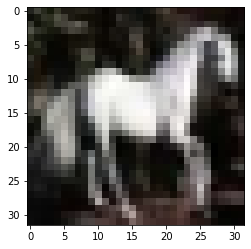

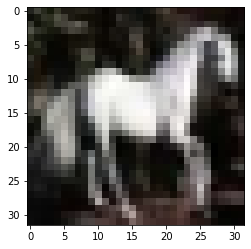

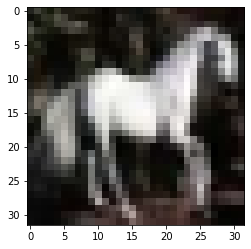

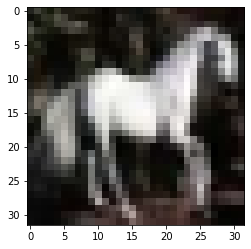

In [0]:
# samples of perturbed images
epsilons = [0, 0.01, 0.03, 0.1]

for eps in epsilons:
  adv_x = x_test[13] + eps*perturbs[13]
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  plt.imshow(adv_x)
  plt.show()

In [0]:
# Without attack
model_org.evaluate(img_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8219 - accuracy: 0.7302


[0.8218686580657959, 0.7301999926567078]

In [0]:
# FGSM attack (epsilon=0.1)
perturbed_img = img_test+0.1*perturbs
model_org.evaluate(perturbed_img, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 3.2715 - accuracy: 0.4545


[3.2714743614196777, 0.4544999897480011]

### PGD attack

In [0]:
def pgd(model, img, label, targeted=False, step_num=100, step_size=0.1, radius=0.04):
  '''
  model: a CNN classifier
  img: input image. ndarray: (batch_size, width, height, channel)
  label: input label. ndarray: (batch_size, label) label assume to be between 0 and #classes-1
  targeted: if True, do gradient descent; if False, do gradient ascent
  step_num: #steps of gradient descent/ascent
  step_size: step size of gradient descent/ascent
  radius: the largest deviation of a single pixel from the input image
  '''
  loss_object = tf.keras.losses.CategoricalCrossentropy()
  num_classes = np.unique(label).shape[0]

  target = tf.squeeze(tf.one_hot(label, num_classes))
  if targeted:
    prediction = model(img, training=False)
    prediction -= target * 1000
    target = tf.argmax(prediction, axis=1)
    target = tf.squeeze(tf.one_hot(target, num_classes))

  # start from a random perturbation around the sample
  x = img + tf.random.normal(img.shape, stddev=0.02)

  for i in range(step_num):
    start = time.time()

    # take a gradient step in the direction of greatest loss
    with tf.GradientTape() as tape:
      tape.watch(x)
      prediction = model(x, training=False)
      loss = loss_object(target, prediction)
    gradient = tape.gradient(loss, x)
    gradient = tf.sign(gradient) * step_size

    if targeted:
      x -= gradient
    else:
      x += gradient

    # project perturbation back into L-infinity ball if necessary
    diff = x - img
    diff = tf.clip_by_value(diff, -radius, radius)
    x = diff + img

    if (i+1)%10 == 0:
      print('{}/{}\t{} seconds'.format(i+1, step_num, time.time()-start))

  return tf.clip_by_value(x, 0, 1)

In [0]:
%%time
x = pgd(model_org, x_test, y_test, targeted=True, step_num=100, step_size=0.1, radius=0.2)

10/100	0.8080019950866699 seconds
20/100	0.8088064193725586 seconds
30/100	0.8150372505187988 seconds
40/100	0.8112986087799072 seconds
50/100	0.8086309432983398 seconds
60/100	0.8085620403289795 seconds
70/100	0.8058638572692871 seconds
80/100	0.816216230392456 seconds
90/100	0.8058655261993408 seconds
100/100	0.8125481605529785 seconds
CPU times: user 41.8 s, sys: 17.9 s, total: 59.7 s
Wall time: 1min 21s


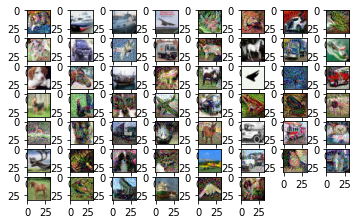

In [0]:
# samples of perturbed images
for i in range(54):
  plt.subplot(8, 8, i+1);
  plt.imshow(x[i]);

In [0]:
# PGD attack
model_org.evaluate(x, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.0032 - accuracy: 0.4021


[4.003237724304199, 0.40209999680519104]

## Defense-GAN

Upload the pre-trained WGAN-GP generator to the Colab workspace before executing the below code.

In [0]:
!unzip wgan

Archive:  wgan.zip
   creating: wgan/
   creating: wgan/assets/
   creating: wgan/variables/
  inflating: wgan/variables/variables.index  
  inflating: wgan/variables/variables.data-00001-of-00002  
  inflating: wgan/variables/variables.data-00000-of-00002  
  inflating: wgan/saved_model.pb     


In [0]:
generator = models.load_model('wgan')

In [0]:
# use WGAN-GP to generate an image that is closest to the original one
@tf.function
def search(noise, image, learning_rate=0.004, step=200):
  for i in range(step):
    with tf.GradientTape() as tape:
      tape.watch(noise)
      fake = generator(noise, training=False)
      loss = tf.reduce_sum((fake - image)**2, axis=[1,2,3])
    
    gradients = tape.gradient(loss, noise)
    noise.assign_sub(learning_rate * gradients)
    
  idx = tf.argmin(loss, axis=0)
  noise = tf.reshape(noise[idx], (1, -1))
  return generator(noise, training=False)

In [0]:
# `search()` only deals with one image, while this function deals with multiple images
def search_batch(images, learning_rate=0.004, step=200):
  predictions = []
  start=time.time()
  for i in range(images.shape[0]):
    noise = tf.random.normal([10, 128])
    noise = tf.Variable(noise, trainable=True)
    predictions.append(search(noise, images[i], learning_rate, step))
    # record progress
    display.clear_output(wait=True)
    if (i+1)%10 == 0:
      print('Batch: {}/{}\tTime: {} sec'.format(i+1, images.shape[0], time.time()-start))
      start=time.time()
  return tf.concat(predictions, axis=0)

In [0]:
%%time
gen_test = search_batch(perturbed_img, step=200)
gen_train = search_batch(x_train, step=200)

In [0]:
# save the generated images
np.save('/content/drive/My Drive/Colab Notebooks/Defense-GAN/data/gen_train', gen_train)
np.save('/content/drive/My Drive/Colab Notebooks/Defense-GAN/data/gen_test', gen_test)

In [0]:
# FGSM attack + defense-gan-org
model_org.evaluate(gen_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1680 - accuracy: 0.4023


[2.1679770946502686, 0.40230000019073486]

In [0]:
# FGSM attack + defense-gan-rec
model_rec.evaluate(gen_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3715 - accuracy: 0.5195


[1.3715101480484009, 0.5195000171661377]

## Results

Accuracy:
- No attack: ~73%
- FGSM attack: ~45%
- PGD attack: ~40%
- FGSM attack + defense-gan-org: ~40%
- FGSM attack + defense-gan-rec: ~52%